In [ ]:
pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.8 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATASET_PATH = Path ('/content/drive/MyDrive/dataset2-tiff')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Build the datablock
datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    splitter = GrandparentSplitter(valid_name = 'test'), #splitter
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = datablock.dataloaders(DATASET_PATH)

In [ ]:
learn = load_learner('/content/drive/MyDrive/Model/data2_ViT_tiff_addepoch.pkl')

In [ ]:
learn.dls = dls

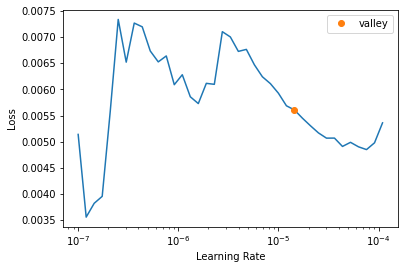

In [ ]:
# find the best learning rate
lr_rate = learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, lr_rate)

epoch,train_loss,valid_loss,accuracy,time
0,0.024492,1.464069,0.732000,34:37
1,0.025998,1.511698,0.730000,34:39
2,0.020127,1.475115,0.738400,34:39
3,0.009824,1.429583,0.740800,34:39
4,0.005533,1.410367,0.748400,34:38


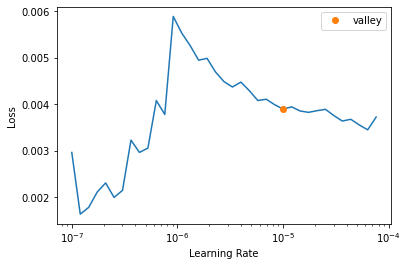

In [ ]:
# find the best learning rate
lr_rate = learn.lr_find()

In [ ]:
learn.fit_one_cycle(8, lr_rate)

epoch,train_loss,valid_loss,accuracy,time
0,0.009863,1.428392,0.750000,34:39
1,0.014167,1.493225,0.737600,34:38
2,0.014091,1.527392,0.734400,34:39
3,0.009589,1.491431,0.740400,34:39
4,0.008141,1.471591,0.750800,34:38
5,0.005225,1.477115,0.742400,34:39
6,0.003910,1.447459,0.748400,34:38
7,0.004325,1.448022,0.750400,34:39


In [ ]:
preds, targets = learn.tta()
accuracy(preds, targets).item()

0.7595999836921692

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATASET_PATH = Path ('/content/drive/MyDrive/dataset1-tiff')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Build the datablock
datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    splitter = GrandparentSplitter(valid_name = 'test'), #splitter
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = datablock.dataloaders(DATASET_PATH)
learn = load_learner('/content/drive/MyDrive/Model/data1_ViT_tiff_addepoch.pkl')
learn.dls = dls

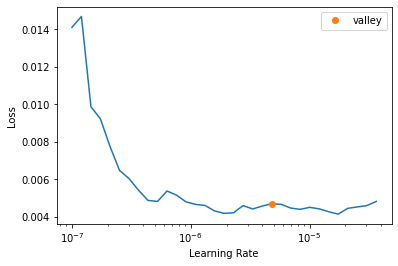

In [ ]:
# find the best learning rate
lr_rate = learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, lr_rate)

epoch,train_loss,valid_loss,accuracy,time
0,0.012741,0.631744,0.867900,2:17:51
1,0.007065,0.620242,0.870800,29:23


In [ ]:
preds, targets = learn.tta()
accuracy(preds, targets).item()

0.8751000165939331

In [ ]:
preds, targets = learn.tta()
accuracy(preds, targets).item()

0.8762000203132629